In [4]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

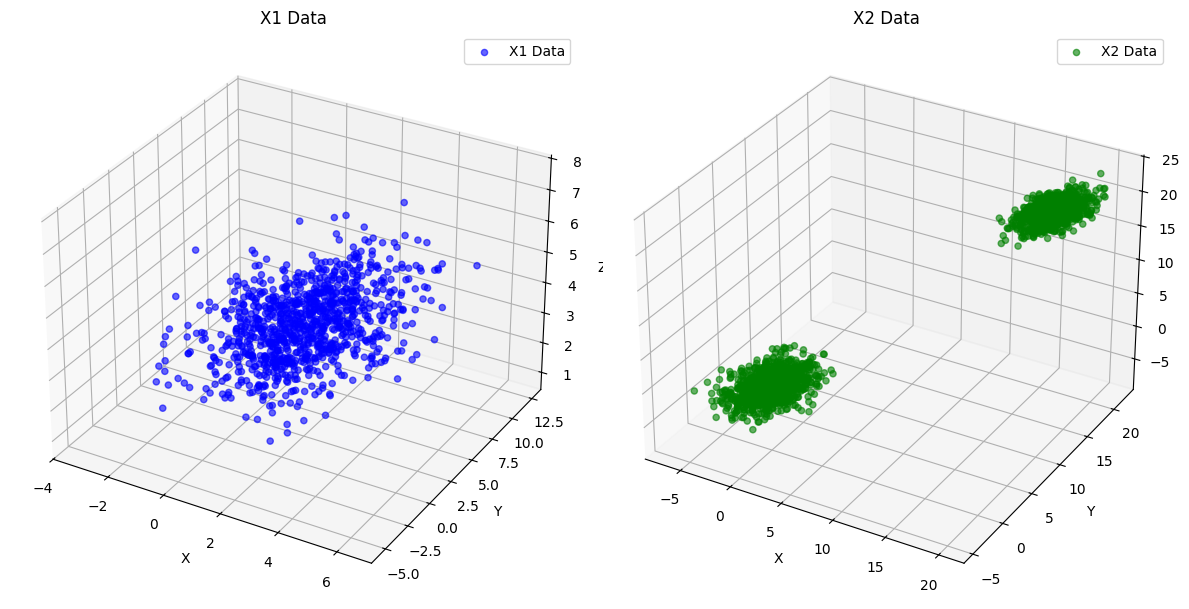

In [5]:
import scipy.io as sio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

# Plotting just the X1 and X2 points initially
fig = plt.figure(figsize=(12, 6))

# Plot for X1
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='blue', alpha=0.6, label='X1 Data')
ax.set_title('X1 Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Plot for X2
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c='green', alpha=0.6, label='X2 Data')
ax.set_title('X2 Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.tight_layout()
plt.show()

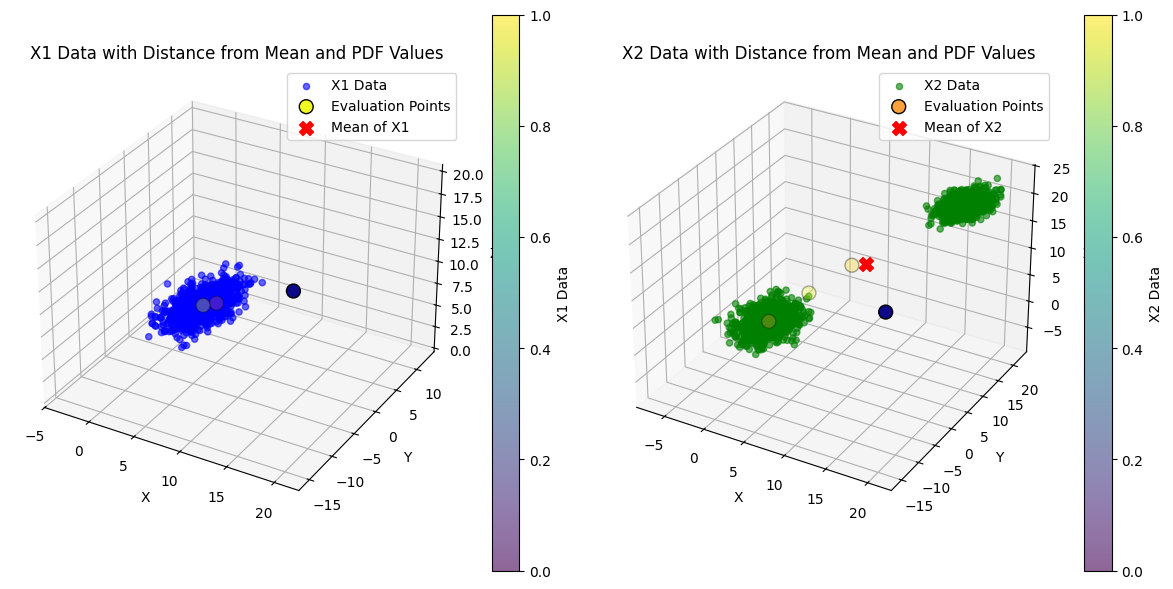

Estimated pdf values for X1 points: [3.37903694e-003 1.28655830e-206 1.95207408e-003]
Estimated pdf values for X2 points: [3.02745641e-004 3.57413507e-004 3.85782183e-004 1.53985535e-131]


In [10]:
import scipy.io as sio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

# Define the points for which we want to estimate the pdf
points_X1 = np.array([[2.01, 2.99, 3.98, 5.02],
                      [20.78, -15.26, 19.38, -25.02],
                      [3.08, 3.88, 4.15, 6.02]])

points_X2 = np.array([[0.05, 0.15, -0.12, -0.08],
                      [7.18, 7.98, 9.12, 9.94],
                      [3.48, 4.01, 4.55, 4.96],
                      [20.78, -15.26, 19.38, -25.02]])

# Compute the mean for X1 and X2
mean_X1 = np.mean(X1, axis=0)
mean_X2 = np.mean(X2, axis=0)

# Fit GMMs to X1 and X2
gmm_X1 = GaussianMixture(n_components=1, covariance_type='full').fit(X1)
pdf_values_X1 = np.exp(gmm_X1.score_samples(points_X1))

gmm_X2 = GaussianMixture(n_components=1, covariance_type='full').fit(X2)
pdf_values_X2 = np.exp(gmm_X2.score_samples(points_X2))

# Plotting the datasets with pdf values visualized
fig = plt.figure(figsize=(12, 6))

# Plot for X1
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='blue', alpha=0.6, label='X1 Data')
ax.scatter(points_X1[:, 0], points_X1[:, 1], points_X1[:, 2], c=pdf_values_X1, cmap='plasma', s=100, edgecolor='k', label='Evaluation Points')
ax.scatter(mean_X1[0], mean_X1[1], mean_X1[2], c='red', s=100, label='Mean of X1', marker='X')
plt.colorbar(sc, ax=ax, label='X1 Data')
ax.set_title('X1 Data with Distance from Mean and PDF Values')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Plot for X2
ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c='green', alpha=0.6, label='X2 Data')
ax.scatter(points_X2[:, 0], points_X2[:, 1], points_X2[:, 2], c=pdf_values_X2, cmap='plasma', s=100, edgecolor='k', label='Evaluation Points')
ax.scatter(mean_X2[0], mean_X2[1], mean_X2[2], c='red', s=100, label='Mean of X2', marker='X')
plt.colorbar(sc, ax=ax, label='X2 Data')
ax.set_title('X2 Data with Distance from Mean and PDF Values')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.tight_layout()
plt.show()

# Print the estimated pdf values for the points
print("Estimated pdf values for X1 points:", pdf_values_X1)
print("Estimated pdf values for X2 points:", pdf_values_X2)


# Exercise 18 Solution: PDF Estimation for Data Points in X1 and X2 Using Gaussian Mixture Modeling

This code uses a Gaussian Mixture Model (GMM) to estimate the probability density function (pdf) values at specific points for two datasets, `X1` and `X2`. We also enrich the pdf modeling by calculating the distance of each data vector from the mean of its dataset, which helps visualize the data spread and density around the mean. Here’s a breakdown of the approach:

---

##  Load Dataset and Define Points for PDF Estimation

We start by loading the datasets `X1` and `X2` from `Dataset.mat`. We also define a set of points for which we want to estimate the pdf values based on each dataset.

- **Dataset**: Each dataset (`X1` and `X2`) contains 4-dimensional data vectors.
- **Points**: We specify points (e.g., `(2.01, 2.99, 3.98, 5.02)`) at which we aim to estimate pdf values using a Gaussian Mixture Model.

---

##  Compute Mean and Distance from Mean

For both `X1` and `X2`, we calculate:
- The **mean vector**, which provides the center of the data distribution.
- The **Euclidean distance** of each data vector from this mean vector.

These distances give us insight into how spread out each dataset is around its mean. In later steps, we use these distances to visualize the density and structure of the data in 3D plots.

---

##  Fit Gaussian Mixture Models (GMM)

We fit a Gaussian Mixture Model (GMM) with one component to each dataset (`X1` and `X2`). This model estimates a Gaussian distribution for each dataset, capturing its pdf structure. Using the `score_samples` method, we compute the log probability density for the specified points, which we exponentiate to get the pdf values.

- **PDF Estimation**: The GMM provides a parametric approach to estimating the pdf, using the underlying Gaussian structure of the data.
- **Output**: We obtain pdf values for each specified point in `X1` and `X2`.

---

##  Visualize Data and PDF Estimation with 3D Scatter Plots

We create two 3D scatter plots (one for each dataset) to visualize the distribution of data points and estimated pdf values. Here’s how each plot is structured:

### Plot Structure
- **Dataset Points**: The data points in `X1` and `X2` are shown with color intensity representing their **distance from the mean**. Points closer to the mean have a lighter color, while those farther away have a darker color.
- **Evaluation Points**: The specified points for pdf estimation are marked with black edges and sized slightly larger for visibility. The color of these points represents the **pdf value** estimated by the GMM model.
- **Color Bar**: Each subplot includes a color bar that indicates the distance from the mean, enhancing our understanding of the data spread relative to the center.

---

##  Interpretation of Results

- **PDF Values**: The estimated pdf values are displayed for each evaluation point, giving an understanding of how likely these points are according to the Gaussian distribution fitted to `X1` and `X2`.
- **Data Structure and Spread**: The color gradient from each plot reflects the distances from the mean, helping us observe how data points are distributed in relation to the center.

